In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml/Hitters.csv')
df.dropna(inplace=True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


**Standardization**

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
df = StandardScaler().fit_transform(df)

In [10]:
df[:4,:4]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 ],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348]])

**Reduce the data set to two components**

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

In [14]:
components_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
components_df.head()

,PC1,PC2
0,0.076848,-1.653525
1,0.337127,2.320560
2,3.408362,-0.755757
3,-2.642221,0.361486
4,1.071681,1.511674


In [15]:
pca_explained_variance = pca.explained_variance_ratio_
pca_explained_variance

array([0.45245466, 0.24246801])

In [16]:
pca.components_

array([[ 0.19506377,  0.19410007,  0.19690453,  0.19491272,  0.22956638,
         0.20673717,  0.271085  ,  0.31970454,  0.32077315,  0.30810145,
         0.32761493,  0.32977446,  0.30573146,  0.08303783,  0.00159189,
        -0.00529271,  0.24914187],
       [ 0.38407792,  0.37764493,  0.22866298,  0.37459128,  0.31026531,
         0.23115759, -0.26820405, -0.19641268, -0.18589726, -0.13386448,
        -0.17692929, -0.17283361, -0.19698297,  0.16295204,  0.17624626,
         0.20978299,  0.05452611]])

In [19]:
pca.components_[0]

array([ 0.19506377,  0.19410007,  0.19690453,  0.19491272,  0.22956638,
        0.20673717,  0.271085  ,  0.31970454,  0.32077315,  0.30810145,
        0.32761493,  0.32977446,  0.30573146,  0.08303783,  0.00159189,
       -0.00529271,  0.24914187])

In [20]:
pca.components_[1]

array([ 0.38407792,  0.37764493,  0.22866298,  0.37459128,  0.31026531,
        0.23115759, -0.26820405, -0.19641268, -0.18589726, -0.13386448,
       -0.17692929, -0.17283361, -0.19698297,  0.16295204,  0.17624626,
        0.20978299,  0.05452611])

**Number of Optimum Component**

Text(0, 0.5, 'cumulative explained variance')

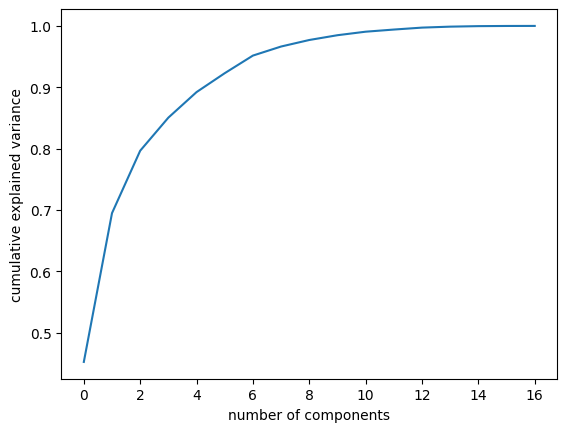

In [21]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))  # cumulative sum
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# varyans: verisetinin taşıdığı bilgi
# değişkenlerin her birisi bir bileşen olursa datasette bir bilgi kaybı olamamış olur
# bu yüzden bileşen sayısı arttıkça varyans artar

In [22]:
pca.explained_variance_ratio_

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

**Final Model**

In [23]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

In [24]:
pca.explained_variance_ratio_
# 3 component ile %80 nini açıklayabiliyoruz

array([0.45245466, 0.24246801, 0.1016968 ])